In [8]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
df_data = pd.DataFrame()
df_data["Algorithm"] = ['ExtraTreesClassifier', 'LinearSVC', 'NuSVC', 'Ridge']
df_data["Accuracy validation"] = [0.89, 0.84, 0.90, 0.90]
df_data["Precision validation"] = [0.80, 0.80, 0.90, 0.90]
df_data["F1-score validation"] = [0.88, 0.81, 0.88, 0.88]
df_data["Recall validation"] = [1.00, 0.89, 0.90, 0.90]

df_data["Accuracy testing"] = [0.67, 0.80, 0.80, 0.80]
df_data["Precision testing"] = [0.60, 0.80, 0.80, 0.80]
df_data["F1-score testing"] = [0.67, 0.78, 0.78, 0.78]
df_data["Recall testing"] = [0.75, 0.80, 0.80, 0.80]

df_data["Accuracy training"] = [0.78, 0.85, 0.79, 0.87]
df_data["Precision training"] = [0.80, 0.88, 0.80, 0.89]
df_data["F1-score training"] = [0.78, 0.85, 0.78, 0.86]
df_data["Recall training"] = [0.78, 0.85, 0.79, 0.87]

df_data

,Algorithm,Accuracy validation,Precision validation,F1-score validation,Recall validation,Accuracy testing,Precision testing,F1-score testing,Recall testing,Accuracy training,Precision training,F1-score training,Recall training
0,ExtraTreesClassifier,0.89,0.8,0.88,1.00,0.67,0.6,0.67,0.75,0.78,0.80,0.78,0.78
1,LinearSVC,0.84,0.8,0.81,0.89,0.80,0.8,0.78,0.80,0.85,0.88,0.85,0.85
2,NuSVC,0.90,0.9,0.88,0.90,0.80,0.8,0.78,0.80,0.79,0.80,0.78,0.79
3,Ridge,0.90,0.9,0.88,0.90,0.80,0.8,0.78,0.80,0.87,0.89,0.86,0.87


In [24]:
palette = ["#084b83", "#42bfdd", "#bbe6e4"]

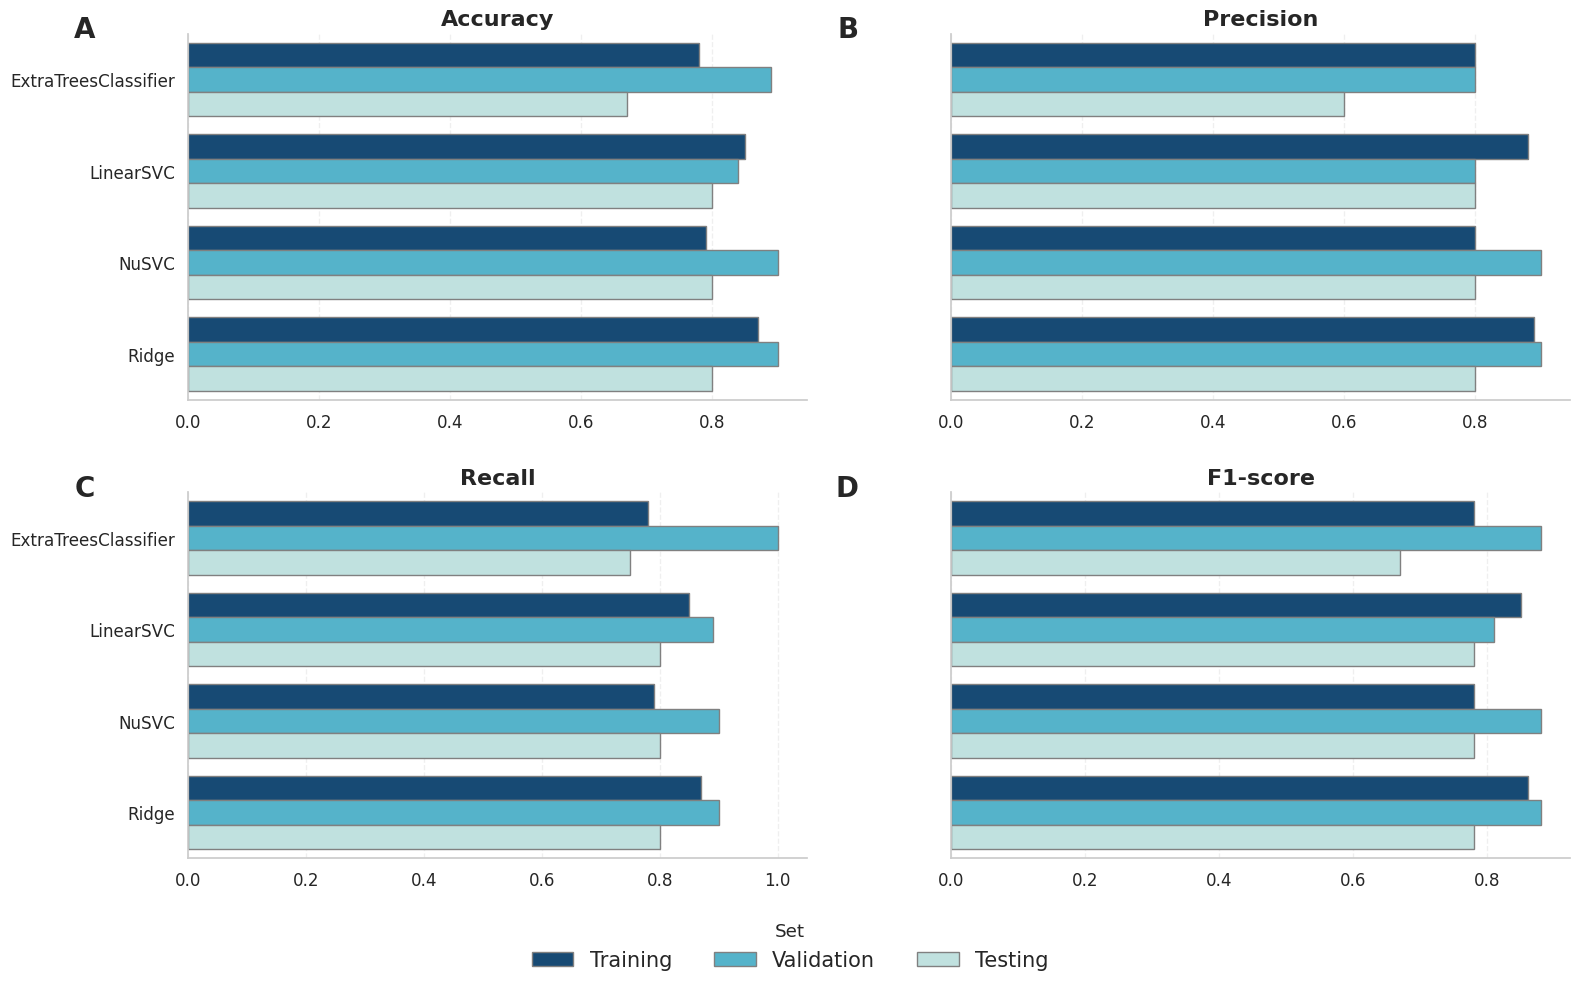

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
sets = ["training", "validation", "testing"]
panel_labels = ["A", "B", "C", "D"]

sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["font.family"] = "DejaVu Sans"

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
axes = axes.flatten()

for i, metric in enumerate(metrics):
    columns = [f"{metric} {s}" for s in sets]
    df_melt = pd.melt(
        df_data[["Algorithm"] + columns],
        id_vars="Algorithm",
        value_vars=columns,
        var_name="Set",
        value_name=metric
    )
    df_melt["Set"] = df_melt["Set"].str.extract(r'(training|validation|testing)', expand=False).str.capitalize()

    ax = axes[i]
    sns.barplot(data=df_melt, y="Algorithm", x=metric, hue="Set", ax=ax,
                palette=palette, edgecolor="gray")

    ax.set_title(f"{metric}", fontsize=16, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(True, axis="x", linestyle="--", alpha=0.3)
    
    ax.text(-0.15, 1.05, panel_labels[i], transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='right')

    #for container in ax.containers:
    #    ax.bar_label(container, fmt="%.2f", label_type='edge', fontsize=12)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Set", loc='lower center', ncol=3, frameon=False, fontsize=15)
for ax in axes:
    ax.get_legend().remove()

sns.despine()
plt.tight_layout(rect=[0, 0.08, 1, 1], h_pad=2, w_pad=2)
plt.savefig("../../results/training_models/metrics_plot.png", dpi=300)
plt.show()
